# Lab-14: Classification of CIFAR-10 data with Data Augmentation

### Suriya S (225229140)


###### Steps

In [33]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from keras.backend import categorical_crossentropy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

##### 1.Import CIFAR-19 dataset from keras

In [2]:
from keras.datasets import cifar10

##### 2.Split train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 1450s 9us/step


In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [6]:
X_train[20]

array([[[153, 157, 155],
        [174, 180, 188],
        [155, 165, 172],
        ...,
        [122, 125, 123],
        [138, 143, 141],
        [ 97, 101,  97]],

       [[160, 163, 165],
        [164, 170, 180],
        [150, 159, 169],
        ...,
        [137, 135, 129],
        [160, 161, 157],
        [103, 109, 107]],

       [[140, 143, 147],
        [147, 152, 166],
        [136, 145, 158],
        ...,
        [104, 103,  99],
        [125, 128, 125],
        [ 93, 102, 101]],

       ...,

       [[175, 177, 179],
        [170, 172, 174],
        [170, 172, 174],
        ...,
        [193, 203, 212],
        [197, 206, 214],
        [199, 204, 213]],

       [[174, 177, 181],
        [173, 176, 180],
        [171, 174, 178],
        ...,
        [200, 208, 216],
        [202, 209, 218],
        [208, 212, 221]],

       [[168, 173, 180],
        [164, 169, 175],
        [166, 171, 177],
        ...,
        [204, 209, 217],
        [204, 208, 217],
        [206, 210, 219]]

##### 3.Convert ytrain and ytest to categorical values

In [7]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

##### 4.Normalize X values by dividing it by 255

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

##### 5.Create the baseline model as below

In [25]:
model = Sequential()
##5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32,(5,5), strides = (2,2), padding = 'same' , input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

##Another 5x5 convolution with 2x2 stride and 32 filters
model.add(Conv2D(32, (5,5), strides = (2,2)))
model.add(Activation('relu'))

##2x2 max pooling reduces to 3x3x32
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

##Flatten turns 3x3x32 into 288x1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation_8 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_9 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 32)          0         
                                                      

##### 6.Train the baseline model

In [27]:
batch_size = 32

#initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005,decay=1e-6)

#lets train the model using RMSprop
model.compile(loss='categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

In [29]:
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_data= (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0839 - accuracy: 0.6251 - val_loss: 1.3160 - val_accuracy: 0.5548
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0837 - accuracy: 0.6266 - val_loss: 1.0320 - val_accuracy: 0.6412
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0776 - accuracy: 0.6298 - val_loss: 1.0265 - val_accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0721 - accuracy: 0.6330 - val_loss: 1.0555 - val_accuracy: 0.6389
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0646 - accuracy: 0.6367 - val_loss: 1.0403 - val_accuracy: 0.6466
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0672 - accuracy: 0.6362 - val_loss: 1.2039 - val_accuracy: 0.6075
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0642 - accuracy: 0.6384 - val_loss: 1.0002 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


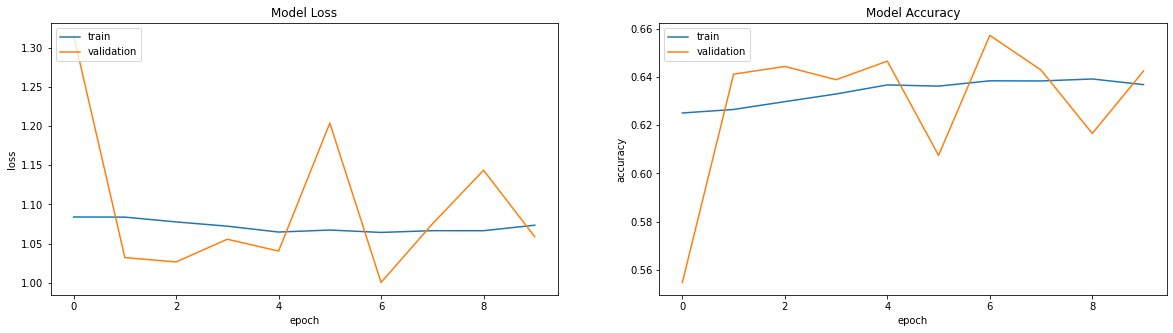

In [46]:
print(history.history.keys())

fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### 7.Define baseline Data Augmentation steps

In [39]:
model1=Sequential()
model1.add(Conv2D(32, (5,5), strides=(2,2),padding='same',input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(32,(5,5),strides=(2,2)))
model1.add(Activation('relu'))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation_12 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_13 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 32)          0         
                                                      

In [40]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

datagen.fit(X_train)

In [42]:
batch_size = 32

#initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005,decay=1e-6)

#lets train the model using RMSprop
model1.compile(loss='categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

In [43]:
#Fit the model on the batches generated by datagen.flow()

history1 = model1.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                   epochs=15,
                   validation_data = (X_test, y_test))

Epoch 1/15


C:\Users\online\AppData\Local\Temp\ipykernel_12936\3185657148.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(datagen.flow(X_train,y_train,batch_size = batch_size),


1562/1562 [==============================] - 16s 10ms/step - loss: 1.7883 - accuracy: 0.3434 - val_loss: 1.4429 - val_accuracy: 0.4769
Epoch 2/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5237 - accuracy: 0.4485 - val_loss: 1.2986 - val_accuracy: 0.5318
Epoch 3/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.4296 - accuracy: 0.4841 - val_loss: 1.2934 - val_accuracy: 0.5486
Epoch 4/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.3744 - accuracy: 0.5069 - val_loss: 1.1716 - val_accuracy: 0.5843
Epoch 5/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.3426 - accuracy: 0.5223 - val_loss: 1.2155 - val_accuracy: 0.5736
Epoch 6/15
1562/1562 [==============================] - 16s 10ms/step - loss: 1.3113 - accuracy: 0.5338 - val_loss: 1.1383 - val_accuracy: 0.5974
Epoch 7/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.2889 - accuracy: 0.5439 - val_loss: 1.1658 - val_accurac

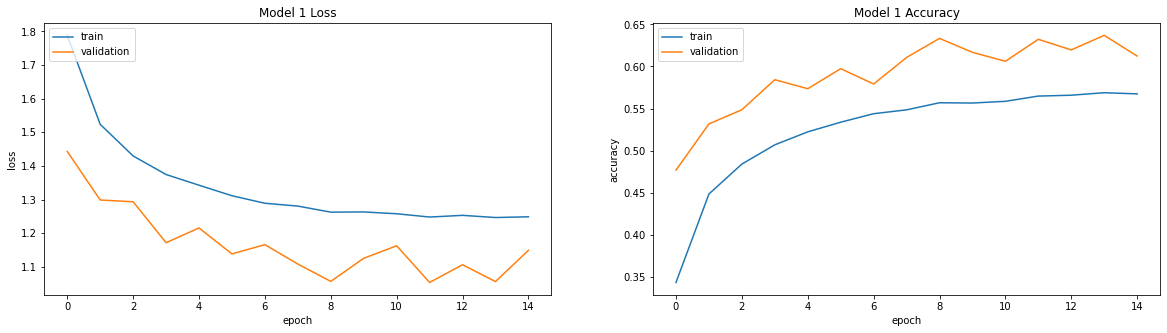

In [47]:
fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1,2,1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### 8.Answer the Questions

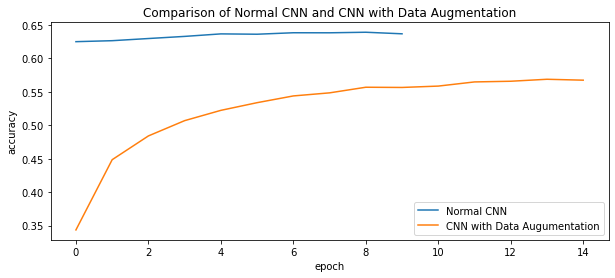

In [49]:
figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('Comparison of Normal CNN and CNN with Data Augmentation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Normal CNN', 'CNN with Data Augumentation'], loc='lower right')
plt.show()

1. The performance with non-augmented training is better than augmented training.


2. Yes, by tunning hyperparameters we could make the model with augmented training performs better.

##### 9.Build a more complicated model with the following pattern:

In [18]:
model2=Sequential()
model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_4 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        25632     
                                                      

In [19]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False,)

datagen.fit(X_train)

In [23]:
batch_size=32

opt=keras.optimizers.RMSprop(lr=.0005,decay=1e-6)

model2.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [24]:
model2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                   steps_per_epoch=X_train.shape[0] // batch_size,
                   epochs=10,
                   validation_data=(X_test,y_test))

Epoch 1/10


C:\Users\online\AppData\Local\Temp\ipykernel_12936\661035635.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),


1562/1562 [==============================] - 116s 74ms/step - loss: 1.3175 - accuracy: 0.5301 - val_loss: 1.1659 - val_accuracy: 0.5818
Epoch 2/10
1562/1562 [==============================] - 116s 74ms/step - loss: 1.1007 - accuracy: 0.6111 - val_loss: 1.0271 - val_accuracy: 0.6519
Epoch 3/10
1562/1562 [==============================] - 116s 74ms/step - loss: 0.9719 - accuracy: 0.6585 - val_loss: 0.8775 - val_accuracy: 0.6953
Epoch 4/10
1562/1562 [==============================] - 117s 75ms/step - loss: 0.8985 - accuracy: 0.6848 - val_loss: 0.8341 - val_accuracy: 0.7159
Epoch 5/10
1562/1562 [==============================] - 118s 75ms/step - loss: 0.8501 - accuracy: 0.7046 - val_loss: 0.8537 - val_accuracy: 0.7017
Epoch 6/10
1562/1562 [==============================] - 117s 75ms/step - loss: 0.8177 - accuracy: 0.7190 - val_loss: 0.8336 - val_accuracy: 0.7234
Epoch 7/10
1562/1562 [==============================] - 118s 75ms/step - loss: 0.7992 - accuracy: 0.7263 - val_loss: 0.8236 - val